# Optimization of Cylindrical/Conical (Steel) Sheels under M, V, T, N Load with Membrane Theory

Loads at Top (z=0):

Loadcase 1: V = 1.76E6, M = 33E9, N = 4E6 \
Loadcase 2: V = 1.6E6, M = 30E9, N = 4E6, T = 22E6

z = 0 to 36000, E = 210000, v = 0.3

Membrane Theory Formulars to calculate Stresses from Global Actions.

Membrane Force from Normal (axial) Force:
$$N_z = \frac{N}{{2 \cdot \pi \cdot r}}$$

Membrane Force from Moment:
$$
N_z = \frac{M}{{r^2 \cdot \pi}} \cdot \cos(\theta - \alpha)
$$

Membrane Force from Vertical Force:
$$
N_z = \frac{V \cdot z}{{\pi \cdot r^2}} \cdot \cos(\theta - \alpha)
$$

Membrane Force (Shear) from Vertical Force:
$$
N_{z_\theta} = \frac{V}{{\pi \cdot r}} \cdot \sin(\theta - \alpha)
$$

Membrane Force (Shear) from Torque:
$$
N_{z_\theta} = \frac{T}{{2 \cdot \pi \cdot r^2}}
$$


## Yield Criterion 

- The Formular for our Yield Criterion from page 149 in lecture booklet.
- Note: $ \sigma_{\theta}=0$ therefore:

$$
\sigma_{eq} = \frac{1}{t} \sqrt{N_z^2 + 3N_{z\theta}^2}
$$

summing up the equations from above leads to:

$$
\sigma_{eq} = \frac{1}{t} \sqrt{\left(\frac{N}{{2 \cdot \pi \cdot r}} + \frac{M}{{r^2 \cdot \pi}} \cdot \cos(\theta - \alpha) + \frac{V \cdot z}{{\pi \cdot r^2}} \cdot \cos(\theta - \alpha)\right)^2 + 3\left(\frac{V}{{\pi \cdot r}} \cdot \sin(\theta - \alpha) + \frac{T}{{2 \cdot \pi \cdot r^2}}\right)^2}
$$


- Assume max. $ \sigma_{eq}$ at $ \theta = 0=2\Pi$
- This Assumption will be checked below. Not true for Cylinders with High Torque/Shear Force and Small Moment.

$$
\sigma_{eq} = \frac{1}{t} \sqrt{\left(\frac{N}{{2 \cdot \pi \cdot r}} + \frac{M}{{r^2 \cdot \pi}} + \frac{V \cdot z}{{\pi \cdot r^2}} \right)^2 + 3\left(\frac{T}{{2 \cdot \pi \cdot r^2}}\right)^2}
$$


Now we subtract the equivalent stress from the material strength (yield stress).
$$
y(r,t) = \sigma_{\text{yield}} - \frac{1}{t} \sqrt{\left(\frac{N}{{2 \cdot \pi \cdot r}} + \frac{M}{{r^2 \cdot \pi}} + \frac{V \cdot z}{{\pi \cdot r^2}} \right)^2 + 3\left(\frac{T}{{2 \cdot \pi \cdot r^2}}\right)^2}
$$
- Plotting this as a heatmap with variable r and t we get positive and negative areas. 
- the positive Areas represent feasible solutions (wit respect to the yield constraint)

- the line where y = 0 represent the optimal solution (with respect to the yield constraint). The function for this Line of Optimum is:
$$
t(r) =\sqrt{\frac{{3T^2 + (2M + Nr + 2Vz)^2}}{{r^4}}} \cdot \frac{1}{{2\pi\sigma_{\text{yield}}}}
$$



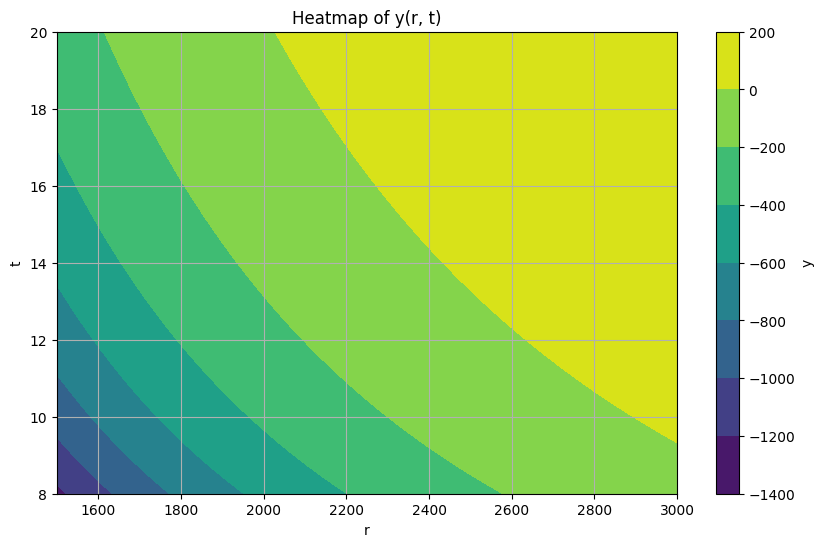

In [1]:
#Plot Heatmap for Set of t and r values

import numpy as np
import matplotlib.pyplot as plt

# Function to calculate y
def calculate_y(r, t, N, M, V, z, T, sigma_yield):
    return sigma_yield - 1/t * np.sqrt(((N / (2 * np.pi * r)) + (M / (r**2 * np.pi)) + (V * z / (np.pi * r**2)))**2 + 3*((T / (2 * np.pi * r**2)))**2)

# Given values
N = 4E6    # Normalkraft
M = 30E9   # Moment
V = 1.6E6   # Vertikalkraft
T = 22E6   # Drehmoment
z = 36000
E = 210000
v = 0.3
sigma_yield = 355  # Yield stress

# Generate values for r and t
r_values = np.linspace(1500, 3000, 100)
t_values = np.linspace(8, 20, 100)

# Create a meshgrid of r and t values
R, T = np.meshgrid(r_values, t_values)

# Calculate corresponding y values
Y = calculate_y(R, T, N, M, V, z, T, sigma_yield)

# Plot heatmap with automatically selected color levels
plt.figure(figsize=(10, 6))
plt.contourf(R, T, Y, cmap='viridis')
plt.colorbar(label='y')
plt.xlabel('r')
plt.ylabel('t')
plt.title('Heatmap of y(r, t)')
plt.grid(True)

plt.show()


In [2]:
#Set equation to 0 and 
#solve for t(r) = ...

import sympy as sp

# Define symbols
r, t, N, M, V, z, T, sigma_yield = sp.symbols('r t N M V z T sigma_yield')

# Define the equation
equation = sp.Eq(sigma_yield - 1/t * sp.sqrt(((N / (2 * sp.pi * r)) + (M / (r**2 * sp.pi)) + (V * z / (sp.pi * r**2)))**2 + 3*((T / (2 * sp.pi * r**2)))**2), 0)

# Solve the equation for t
solutions = sp.solve(equation, t)

# Print the solutions
for sol in solutions:
    print(sol)


sqrt((3*T**2 + (2*M + N*r + 2*V*z)**2)/r**4)/(2*pi*sigma_yield)


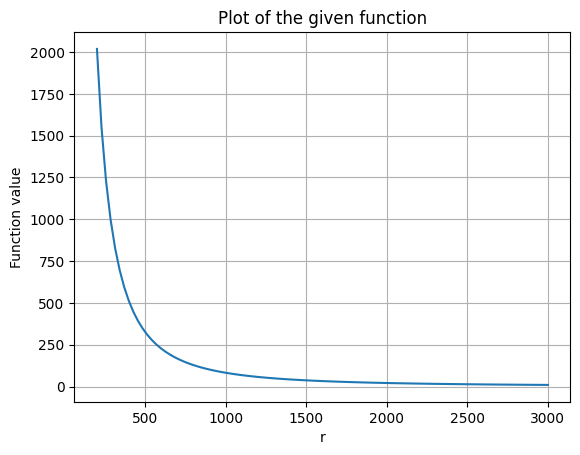

In [3]:
#Plot function that was just calculated

import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

# Define symbols
r, N, M, V, z, T, sigma_yield = sp.symbols('r N M V z T sigma_yield')

# Define the equation
equation = sp.sqrt((3*T**2 + (2*M + N*r + 2*V*z)**2)/r**4)/(2*sp.pi*sigma_yield)

# Convert the equation to a Python function
calculate_value = sp.lambdify((r, N, M, V, z, T, sigma_yield), equation, 'numpy')

# Given values
N_val = 4E6    # Normal force
M_val = 30E9   # Moment
V_val = 1.6E6   # Vertical force
T_val = 22E9   # Torque
z_val = 36000
sigma_yield_val = 355  # Yield stress

# Generate values for r
r_values = np.linspace(200, 3000, 100)

# Calculate corresponding y values
y_values = calculate_value(r_values, N_val, M_val, V_val, z_val, T_val, sigma_yield_val)

# Plot
plt.plot(r_values, y_values)
plt.xlabel('r')
plt.ylabel('Function value')
plt.title('Plot of the given function')
plt.grid(True)
plt.show()


## buckling criterion

$$
N_{cl}=\frac{E \cdot t^2}{r \cdot \sqrt{3(1-v^2)}}
$$

- Assuming Buckling at $ N_{z} = max. $ at $ \theta = 0=2\Pi$
$$
y(r,t)=N_{cl}-N_z = \frac{E \cdot t^2}{r \cdot \sqrt{3(1-v^2)}} - \frac{N}{{2 \cdot \pi \cdot r}} - \frac{M}{{r^2 \cdot \pi}} - \frac{V \cdot z}{{\pi \cdot r^2}}
$$

- We plot this as a heatmap. The positive areas are feasible (with respect to the buckling criterion). The Optimum Solution is at the Line where y(r,t) = 0. Described by the following function.

$$
t(r)=\sqrt{2} \cdot 3^{\frac{1}{4}} \cdot \sqrt{\sqrt{1 - v^2} \cdot \frac{2M + Nr + 2Vz}{Er}} \cdot \frac{1}{2\sqrt{\pi}}
$$

for N << M + Vz -> N -> 0
$$
t(r)=3^{\frac{1}{4}} \cdot \sqrt{\sqrt{1 - v^2} \cdot (M + Vz)} \cdot \frac{1}{{\sqrt{\pi} \cdot \sqrt{Er}}} = 1.583 \cdot 10 ^{-3} \sqrt{\frac{M+Vz}r}
$$


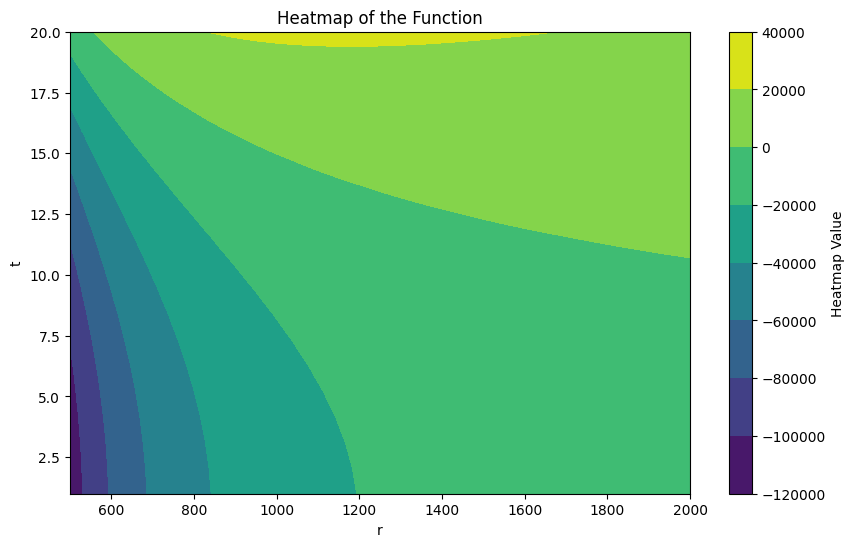

In [4]:
import math
import numpy as np
import matplotlib.pyplot as plt

# Function definition
def calculate_heatmap_value(r, t):
    N = 4E6    # Normal force
    M = 30E9   # Moment
    V = 1.6E6   # Vertical force
    T = 22E9  # Torque
    alpha = 0 # Rotation of force
    z = 36000
    E = 210000
    v = 0.3
    
    return (E * t**2) / (r * math.sqrt(3*(1-v**2))) - N / (2 * math.pi * r) - M / (r**2 * math.pi) - V * z / (math.pi * r ** 2)


# Value ranges for r and t
r_values = np.linspace(500, 2000, 100)  # Example values for r
t_values = np.linspace(1, 20, 19)      # Example values for t

# Creating grid data for r and t
r_grid, t_grid = np.meshgrid(r_values, t_values)

# Calculating heatmap values
heatmap_values = calculate_heatmap_value(r_grid, t_grid)

# Creating a 2D heatmap
plt.figure(figsize=(10, 6))

# Plot 2D Heatmap
heatmap = plt.contourf(r_grid, t_grid, heatmap_values, cmap='viridis')

# Adding axis labels
plt.colorbar(heatmap, label='Heatmap Value')
plt.xlabel('r')
plt.ylabel('t')
plt.title('Heatmap of the Function')

# Display plot
plt.show()


In [5]:
import sympy as sp

# Define symbols
r, t, N, M, V, z, E, v = sp.symbols('r t N M V z E v')

# Define the equation
equation = (E * t**2) / (r * sp.sqrt(3*(1-v**2))) - N / (2 * sp.pi * r) - M / (r**2 * sp.pi) - V * z / (sp.pi * r ** 2)

# Solve the equation
solution = sp.solve(equation, t)

solution


[-sqrt(2)*3**(1/4)*sqrt(sqrt(1 - v**2)*(2*M + N*r + 2*V*z)/(E*r))/(2*sqrt(pi)),
 sqrt(2)*3**(1/4)*sqrt(sqrt(1 - v**2)*(2*M + N*r + 2*V*z)/(E*r))/(2*sqrt(pi))]

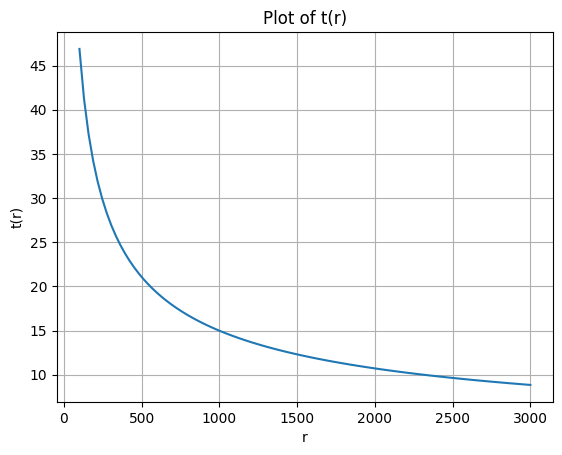

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Given values
N = 4E6    # Normal force
M = 30E9   # Moment
V = 1.6E6   # Vertical force
T = 22E9  # Torque
alpha = 0 # Rotation of force
z = 36000
E = 210000
v = 0.3

# Function to calculate t(r)
def calculate_t(r):
    return np.sqrt(2) * 3**(1/4) * np.sqrt(np.sqrt(1 - v**2) * (2*M + N*r + 2*V*z) / (E*r)) / (2 * np.sqrt(np.pi))

# Generate values for r
r_values = np.linspace(100, 3000, 100)

# Calculate corresponding t values
t_values = calculate_t(r_values)

# Plot
plt.plot(r_values, t_values)
plt.xlabel('r')
plt.ylabel('t(r)')
plt.title('Plot of t(r)')
plt.grid(True)
plt.show()


Bringing together the two lines from buckling and yielding constraint, that mark the boundary of the feasible area

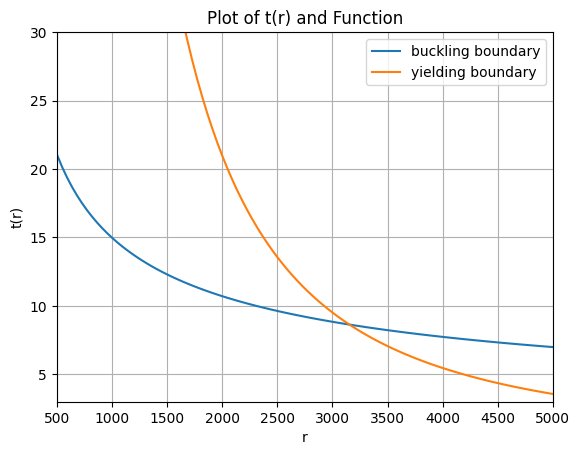

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

# Given values
N = 4E6    # Normal force
M = 30E9   # Moment
V = 1.6E6   # Vertical force
T = 22E9  # Torque
alpha = 0 # Rotation of force
z = 36000
E = 210000
v = 0.3

# Function to calculate t(r)
def calculate_t(r):
    return np.sqrt(2) * 3**(1/4) * np.sqrt(np.sqrt(1 - v**2) * (2*M + N*r + 2*V*z) / (E*r)) / (2 * np.sqrt(np.pi))

# Generate values for r
r_values = np.linspace(500, 5000, 100)

# Calculate corresponding t values
t_values = calculate_t(r_values)

# Plot
plt.plot(r_values, t_values, label='buckling boundary')
plt.xlabel('r')
plt.ylabel('t(r)')
plt.title('Plot of t(r) and Function')
plt.grid(True)

# Define symbols
r, N, M, V, z, T, sigma_yield = sp.symbols('r N M V z T sigma_yield')

# Define the equation
equation = sp.sqrt((3*T**2 + (2*M + N*r + 2*V*z)**2)/r**4)/(2*sp.pi*sigma_yield)

# Convert the equation to a Python function
calculate_value = sp.lambdify((r, N, M, V, z, T, sigma_yield), equation, 'numpy')

# Given values
N_val = 4E6    # Normal force
M_val = 30E9   # Moment
V_val = 1.6E6   # Vertical force
T_val = 22E9   # Torque
z_val = 36000
sigma_yield_val = 355  # Yield stress

# Generate values for r
r_values = np.linspace(500, 5000, 100)

# Calculate corresponding y values
y_values = calculate_value(r_values, N_val, M_val, V_val, z_val, T_val, sigma_yield_val)

# Plot
plt.plot(r_values, y_values, label='yielding boundary')
plt.ylim(3, 30)  # Limit y-axis from 3 to 20
plt.xlim(500, 5000)  # Limit x-axis from 500 to 3000
plt.legend()
plt.show()


Interpretation of the Graph

- The feasible Area is the Area above both graphs
- The yielding boundary limits the feasible area to the left side. Which is intuitiv understandable as lower radius leads to higher Membrane Forces from Moments. On the right side the feasible area is limited by the buckling area, which means that Larger Radius requires larger thickness as it get's more unstable.  

-The point where both functions cut is the optimum solution for membrane theory, considering the both constraints yielding and buckling as described above.

Let's take the two functions for the constraints again
$$
t_1(r) =\sqrt{\frac{{3T^2 + (2M + Nr + 2Vz)^2}}{{r^4}}} \cdot \frac{1}{{2\pi\sigma_{\text{yield}}}}
$$
$$
t_2(r)=\sqrt{2} \cdot 3^{\frac{1}{4}} \cdot \sqrt{\sqrt{1 - v^2} \cdot \frac{2M + 2Vz}{Er}} \cdot \frac{1}{2\sqrt{\pi}}
$$


and rewrite them

$$
t_1(r) = \frac{C_1}{r^2}
$$ 
with
$$
 C_1 = \sqrt{\{3T^2 + (2M + Nr + 2Vz)^2} \cdot \frac{1}{{2\pi\sigma_{\text{yield}}}}
$$
$$
t_2(r) = \frac{C_2}{\sqrt{r}}
$$ 
with
$$
C_2 = 3^{\frac{1}{4}} \cdot \sqrt{\sqrt{1 - v^2} \cdot \frac{M + Vz}{E}} \cdot \frac{1}{\sqrt{\pi}}
$$

Set them Equal and solve for r and drop Complex solutions

$$
r=\left(\frac{{C1^2}}{{C2^2}}\right)^{\frac{1}{3}}
$$

Insert C1 and C2 again
$$
r = \left(\frac{(\sqrt{\{3T^2 + (2M + Nr + 2Vz)^2} \cdot \frac{1}{{2\pi\sigma_{\text{yield}}}})^2}{(3^{\frac{1}{4}} \cdot \sqrt{\sqrt{1 - v^2} \cdot \frac{M + Vz}{E}} \cdot \frac{1}{\sqrt{\pi}})^2}\right)^{1/3}
$$




## Calculate Results for optimal thickness over tower height:

- result is obviously wrong (too small r)

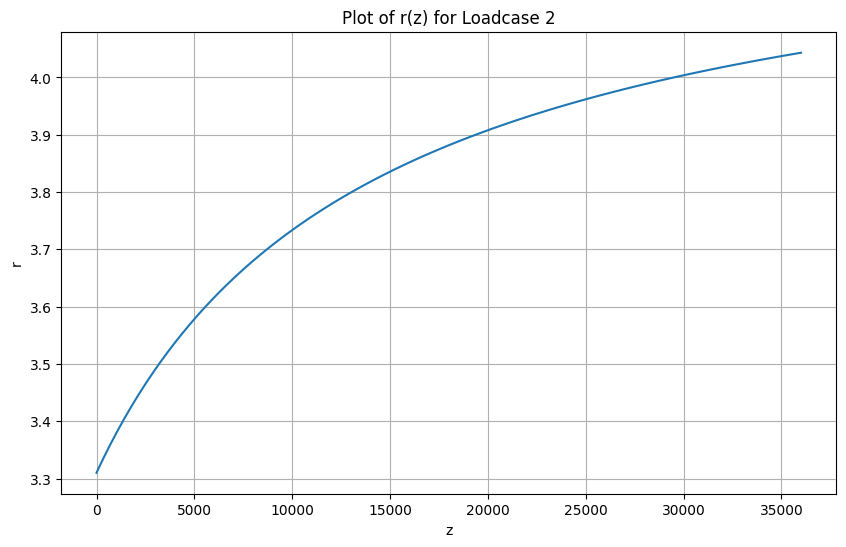

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

# Given values
V_val = 1.6E6
M_val = 30E9
N_val = 4E6
T_val = 22E6
E_val = 210000
v_val = 0.3
sigma_yield_val = 355

# Define symbols
z, T, M, N, V, E, v, sigma_yield = sp.symbols('z T M N V E v sigma_yield')

# Define the formula for r
numerator = sp.sqrt(3*T**2 + (2*M + N*z + 2*V*z)**2) / (2*sp.pi*sigma_yield)
denominator = (3**(1/4) * sp.sqrt(sp.sqrt(1 - v**2) * (M + V*z) / E) * sp.sqrt(sp.pi))**2
r_expression = sp.Pow(numerator / denominator, 1/3)

# Substitute given values
r_expression = r_expression.subs({T: T_val, M: M_val, N: N_val, V: V_val, E: E_val, v: v_val, sigma_yield: sigma_yield_val})

# Generate z values
z_values = np.linspace(0, 36000, 100)

# Calculate corresponding r values
r_values = np.array([r_expression.subs(z, z_val).evalf() for z_val in z_values])

# Plot
plt.figure(figsize=(10, 6))
plt.plot(z_values, r_values)
plt.xlabel('z')
plt.ylabel('r')
plt.title('Plot of r(z) for Loadcase 2')
plt.grid(True)
plt.show()


# check if assumption max. $ \sigma_{eq}$ at $ \theta = 0=2\Pi$ is correct

- assume correct for this tower as $N_z >> N_{z_\theta}$
- see following cells

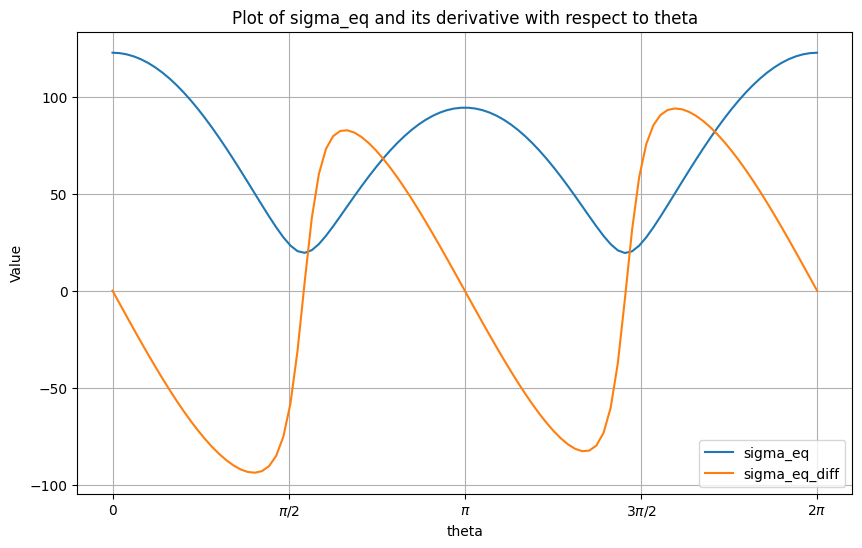

In [14]:
#2D Plot of equivalent stresses at height z

import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

# Define symbols
theta, t, N, M, V, T, r, alpha, z = sp.symbols('theta t N M V T r alpha z')

# Define the function
sigma_eq = 1/t * sp.sqrt((N / (2 * sp.pi * r) + M / (r**2 * sp.pi) * sp.cos(theta - alpha) + V * z / (sp.pi * r ** 2) * sp.cos(theta - alpha))**2 + 3*(V / (sp.pi * r) * sp.sin(theta - alpha) + T / (2 * sp.pi * r**2))**2)

# Differentiate the function with respect to theta
sigma_eq_diff = sp.diff(sigma_eq, theta)

# Convert the symbolic expressions to callable functions
sigma_eq_func = sp.lambdify((theta, t, N, M, V, T, r, alpha, z), sigma_eq, 'numpy')
sigma_eq_diff_func = sp.lambdify((theta, t, N, M, V, T, r, alpha, z), sigma_eq_diff, 'numpy')

# Generate values for theta
theta_values = np.linspace(0, 2*np.pi, 100)



# Given values
N_val = 4E6    # Normal force
M_val = 30E9  # Moment
V_val = 1.6E6   # Vertical force
T_val = 22E6 # Torque
r_val = 3000
alpha_val = 0
z_val = 10000
t_val = 15  # Example value for t

# Calculate corresponding sigma_eq values
sigma_eq_values = sigma_eq_func(theta_values, t_val, N_val, M_val, V_val, T_val, r_val, alpha_val, z_val)

# Calculate corresponding sigma_eq_diff values
sigma_eq_diff_values = sigma_eq_diff_func(theta_values, t_val, N_val, M_val, V_val, T_val, r_val, alpha_val, z_val)

# Plot
plt.figure(figsize=(10, 6))

# Plot sigma_eq
plt.plot(theta_values, sigma_eq_values, label='sigma_eq')

# Plot sigma_eq_diff
plt.plot(theta_values, sigma_eq_diff_values, label='sigma_eq_diff')

# Customize x-axis ticks to represent multiples of pi
plt.xticks(np.linspace(0, 2*np.pi, 5), ['0', '$\pi/2$', '$\pi$', '$3\pi/2$', '$2\pi$'])

plt.xlabel('theta')
plt.ylabel('Value')
plt.title('Plot of sigma_eq and its derivative with respect to theta')
plt.grid(True)
plt.legend()

plt.show()


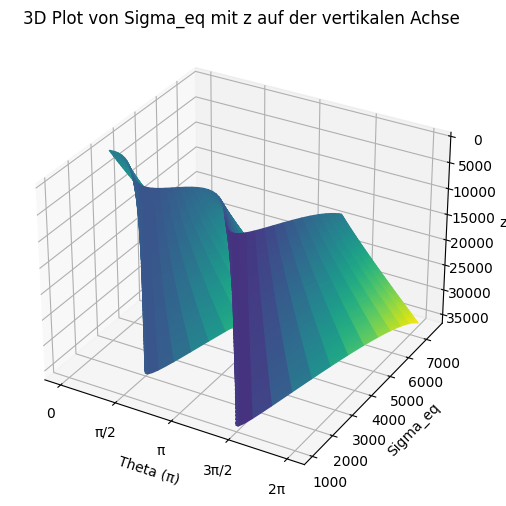

In [13]:
#3D Plot of equivalent stresses

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Gegebene Parameter LC1
'''N = 4E6    # Normalkraft
M = 33E9   # Moment
V = 1.76E6   # Vertikalkraft
T = 0   # Drehmoment
r = 2000    # Radius'''

# Gegebene Parameter LC2
N = 4E6    # Normalkraft
M = 30E9   # Moment
V = 1.6E6   # Vertikalkraft
T = 22E9   # Drehmoment
r = 2000   # Radius


alpha = 0 # Rotationswinkel der Kraft
z_values = np.linspace(0, 36000, 100)
theta_values = np.linspace(0, 2*np.pi, 100)

# Erstellen eines Gitters für z_values und theta_values
Z, THETA = np.meshgrid(z_values, theta_values)

# Berechnung von sigma_eq für jedes Gitterpunkt
sigma_eq_values = 1 / 1 * np.sqrt((N / (2 * np.pi * r) + M / (r**2 * np.pi) * np.cos(THETA - alpha) + V * Z / (np.pi * r**2) * np.cos(THETA - alpha))**2 + 3 * (V / (np.pi * r) * np.sin(THETA - alpha) + T / (2 * np.pi * r**2))**2)

# 3D-Plot der Fläche
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(THETA, sigma_eq_values, Z, cmap='viridis', facecolors=plt.cm.viridis(sigma_eq_values / np.max(sigma_eq_values)))
# Invertieren der Z-Achse
ax.invert_zaxis()
# Achsenbeschriftungen
ax.set_xlabel('Theta (π)')
ax.set_ylabel('Sigma_eq')
ax.set_zlabel('z')
ax.set_title('3D Plot von Sigma_eq mit z auf der vertikalen Achse')

# Beschriftung der Theta-Achse mit Pi-Werten
ax.set_xticks([0, np.pi/2, np.pi, 3*np.pi/2, 2*np.pi])
ax.set_xticklabels(['0', 'π/2', 'π', '3π/2', '2π'])

plt.show()


In [11]:
import sympy as sp

# Define symbols
r, C1, C2 = sp.symbols('r C1 C2')

# Define the expressions
t1 = C1 / r**2
t2 = C2 / sp.sqrt(r)

# Solve the equation t1(r) = t2(r) for r
solution = sp.solve(sp.Eq(t1, t2), r)

print(solution)


[(C1**2/C2**2)**(1/3), (C1**2/C2**2)**(1/3)*(-1 - sqrt(3)*I)/2, (C1**2/C2**2)**(1/3)*(-1 + sqrt(3)*I)/2]
